In [1]:
import pandas as pd
import numpy as np
import pickle as pkl
import datetime as datetime
from tqdm import tqdm
import networkx as nx
import random

import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from torch.optim.lr_scheduler import StepLR
from src.utils.CreateFeatures import CreateFeatures
from src.pygcn.SiameseGNN import SiameseGNN
from src.pygcn.GraphSAGE import SiameseGNN_GraphSAGE
from src.pygcn.graph_isomorphism import SiameseGNN_GIN
from torch_geometric.data import DataLoader
from sklearn.metrics import f1_score, fbeta_score
from src.utils.functions import dist_labels_to_changepoint_labels, dist_labels_to_changepoint_labels_adjusted
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch
import torch_geometric.data as data
from src.synthetic_experiments.sample import sample_pairs
from src.utils.misc import collate
import itertools
from src.pygcn.GAT import SiameseGNN_GAT

## All Events

In [2]:
years = range(1962,2019)

In [3]:
all_nodes = ['ABW', 'AFG', 'AGO', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ASM',
       'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD',
       'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BMU', 'BOL', 'BRA',
       'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CHE', 'CHL', 'CHN',
       'CIV', 'CMR', 'COD', 'COG', 'COL', 'COM', 'CPV', 'CRI', 'CUB',
       'CUW', 'CYM', 'CYP', 'CZE', 'DEU', 'DMA', 'DNK', 'DOM', 'DZA',
       'ECU', 'EGY', 'ESP', 'EST', 'ETH', 'FIN', 'FJI', 'FRA', 'FSM',
       'GAB', 'GBR', 'GEO', 'GHA', 'GIN', 'GMB', 'GNB', 'GNQ', 'GRC',
       'GRD', 'GRL', 'GTM', 'GUM', 'GUY', 'HKG', 'HND', 'HRV', 'HTI',
       'HUN', 'IDN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA',
       'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KNA', 'KOR',
       'KWT', 'LAO', 'LBN', 'LBR', 'LBY', 'LCA', 'LKA', 'LSO', 'LTU',
       'LUX', 'LVA', 'MAC', 'MAR', 'MDA', 'MDG', 'MDV', 'MEX', 'MHL',
       'MKD', 'MLI', 'MLT', 'MMR', 'MNE', 'MNG', 'MNP', 'MOZ', 'MRT',
       'MUS', 'MWI', 'MYS', 'NAM', 'NER', 'NGA', 'NIC', 'NLD', 'NOR',
       'NPL', 'NRU', 'NZL', 'OMN', 'PAK', 'PAN', 'PER', 'PHL', 'PLW',
       'PNG', 'POL', 'PRT', 'PRY', 'PSE', 'PYF', 'QAT', 'ROU', 'RUS',
       'RWA', 'SAU', 'SDN', 'SEN', 'SGP', 'SLB', 'SLE', 'SLV', 'SMR',
       'SRB', 'SSD', 'STP', 'SUR', 'SVK', 'SVN', 'SWE', 'SWZ', 'SXM',
       'SYC', 'SYR', 'TCD', 'TGO', 'THA', 'TJK', 'TKM', 'TLS', 'TON',
       'TTO', 'TUN', 'TUR', 'TUV', 'TZA', 'UGA', 'UKR', 'URY', 'USA',
       'UZB', 'VCT', 'VEN', 'VNM', 'VUT', 'WSM', 'YEM', 'ZAF', 'ZMB',
       'ZWE']

In [4]:
with open("src/pygcn/all_graphs.pkl", "rb") as f:         
    all_graphs = pkl.load(f)

In [5]:
crisis_years = [1962, 1967, 1973, 1978, 1981, 1989, 1993, 1996, 2002, 2007, 2012, 2014, 2016]
phases = []
p = -1
for i in range(1962,2019):
    if i in crisis_years:
        p += 1
    phases.append(p)

In [58]:
# labels = dist_labels_to_changepoint_labels(phases)
# graph_pairs = sample_pairs(all_graphs,labels)

In [59]:
# with open('graph_pairs_nogdp.pkl', 'wb') as f:
#     pkl.dump(graph_pairs, f)

In [60]:
# with open('graph_pairs.pkl', 'rb') as f:
#     graph_pairs = pkl.load(f)

In [61]:
# with open('test_data.pkl', 'rb') as f:
#     test_data = pkl.load(f)

# with open('val_data.pkl', 'rb') as f:
#     val_data = pkl.load(f)

# with open('train_data.pkl', 'rb') as f:
#     train_data = pkl.load(f)

In [6]:
with open('test_data_indices.pkl', 'rb') as f:
    test_indices = pkl.load(f)

with open('val_data_indices.pkl', 'rb') as f:
    val_indices = pkl.load(f)

with open('train_data_indices.pkl', 'rb') as f:
    train_indices = pkl.load(f)

In [63]:
# train_indices, test_indices = train_test_split(np.arange(len(graph_pairs)), test_size=0.40, random_state=42)
# test_indices, val_indices = train_test_split(test_indices, test_size=0.5, random_state=42)

In [64]:
# graph_pairs_train = [graph_pairs[i] for i in train_indices]
# graph_pairs_test = [graph_pairs[i] for i in test_indices]
# graph_pairs_val = [graph_pairs[i] for i in val_indices]

In [65]:
# import random
# positive_samples = [item for item in graph_pairs_train if item[2] == 1]
# negative_samples = [item for item in graph_pairs_train if item[2] == 0]

# # Calculate the difference in count
# diff = len(negative_samples) - len(positive_samples)

# # Upsample positive samples
# if diff > 0:
#     positive_samples_upsampled = random.sample(positive_samples, k=abs(diff))
#     balanced_data = negative_samples + positive_samples+ positive_samples_upsampled
# # Downsample negative samples
# elif diff < 0:
#     negative_samples_downsampled = random.sample(negative_samples, k=abs(diff))
#     balanced_data = negative_samples_downsampled + negative_samples+ positive_samples
# else:
#     balanced_data = graph_pairs_train

# random.shuffle(balanced_data)

In [66]:
# with open('train_data_nogdp.pkl', 'wb') as f:
#     pkl.dump(balanced_data, f)

# with open('val_data_nogdp.pkl', 'wb') as f:
#     pkl.dump(graph_pairs_val, f)
    
# with open('test_data_nogdp.pkl', 'wb') as f:
#     pkl.dump(graph_pairs_test, f)

In [67]:
# with open('train_data_indices_nogdp.pkl', 'wb') as f:
#     pkl.dump(train_indices, f)

# with open('val_data_indices_nogdp.pkl', 'wb') as f:
#     pkl.dump(val_indices, f)
    
# with open('test_data_indices_nogdp.pkl', 'wb') as f:
#     pkl.dump(test_indices, f)

In [7]:
with open('train_data.pkl', 'rb') as f:
    balanced_data = pkl.load(f)

with open('val_data.pkl', 'rb') as f:
    graph_pairs_val = pkl.load(f)
    
with open('test_data.pkl', 'rb') as f:
    graph_pairs_test = pkl.load(f)

## sGNN with GCN Encoder and 3 Features

In [26]:
import torch
import torch.optim as optim
import torch.nn as nn
from torch.optim.lr_scheduler import StepLR
from sklearn.model_selection import KFold
from tqdm import tqdm
from sklearn.metrics import f1_score, fbeta_score
import numpy as np

def run_model_normal(model, type, training_data_pairs, val_data_pairs, hyperparameters, sort_k, hidden_units, dropout_rate, num_folds=5, num_epochs=20):
    
    val_acc = 0
    val_f1 = 0
    val_f2 = 0
    val_f05 = 0

    val_loss_arr = []
    train_loss_arr = []

    model = SiameseGNN_GraphSAGE(sort_k, 27, dropout_rate, 8)
        
    torch.manual_seed(42)
    optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=0.0001)
    scheduler = StepLR(optimizer, step_size=10, gamma=0.1)
    criterion = nn.BCELoss()  # Changed to BCEWithLogitsLoss for numerical stability

    for epoch in tqdm(range(num_epochs)):
        model.train()
        train_losses = []
        for (graph1, graph2, labels) in training_data_pairs:
            optimizer.zero_grad()
            out = model(graph1, graph2)

            loss = criterion(out, labels)
            loss.backward()
            optimizer.step()
            train_losses.append(loss.item())

        scheduler.step()

        model.eval()
        with torch.no_grad():
            val_losses = []
            val_pred = []
            val_truth = []

            correct = 0
            total = 0
            for (graph1, graph2, labels) in val_data_pairs:
                out = model(graph1, graph2)

                val_loss = criterion(out, labels)
                val_losses.append(val_loss.item())

                predictions = torch.round(out)

                val_pred.extend(predictions.cpu().numpy())
                val_truth.extend(labels.cpu().numpy())

                correct += (predictions == labels).sum().item()
                total += labels.size(0)

            val_loss = sum(val_losses) / len(val_losses)
            val_accuracy = correct / total

        val_f1 = f1_score(val_truth, val_pred)
        val_f2 = fbeta_score(y_true=val_truth, y_pred=val_pred, beta=2)
        val_f05 = fbeta_score(y_true=val_truth, y_pred=val_pred, beta=1 / 2)

        train_loss_arr.append(sum(train_losses) / len(train_losses))
        val_loss_arr.append(val_loss)
        print(f'Epoch: {epoch + 1}, Training Loss: {sum(train_losses) / len(train_losses)}, Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}, F1 Score: {val_f1}, F2 Score: {val_f2}, F0.5 Score: {val_f05}')

    model_name = f"models/real_data/sage-f{hyperparameters}_window.pt"
    torch.save(model.state_dict(), model_name)

    return train_losses, val_losses

In [17]:
import torch
import torch.optim as optim
import torch.nn as nn
from torch.optim.lr_scheduler import StepLR
from sklearn.model_selection import KFold
from tqdm import tqdm
from sklearn.metrics import f1_score, fbeta_score
import numpy as np

def run_model_cv(model, type, data_pairs, num_folds=5, num_epochs=30):
    
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    fold_scores = []

    val_acc = 0
    val_f1 = 0
    val_f2 = 0
    val_f05 = 0

    for fold, (train_index, val_index) in enumerate(kf.split(data_pairs)):
        print(f"Fold {fold + 1}/{num_folds}")
        model = SiameseGNN_GraphSAGE(50, 27, 0.1, 16)

        torch.manual_seed(42)
        optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=0.0001)
        scheduler = StepLR(optimizer, step_size=10, gamma=0.1)
        criterion = nn.BCELoss()  # Changed to BCEWithLogitsLoss for numerical stability

        # Prepare data for current fold
        training_data_pairs = [data_pairs[i] for i in train_index]
        validation_data_pairs = [data_pairs[i] for i in val_index]

        for epoch in tqdm(range(num_epochs)):
            model.train()
            train_losses = []
            for (graph1, graph2, labels) in training_data_pairs:
                optimizer.zero_grad()
                out = model(graph1, graph2)

                loss = criterion(out, labels)
                loss.backward()
                optimizer.step()
                train_losses.append(loss.item())

            scheduler.step()

            model.eval()
            with torch.no_grad():
                val_losses = []
                val_pred = []
                val_truth = []

                correct = 0
                total = 0
                for (graph1, graph2, labels) in validation_data_pairs:
                    out = model(graph1, graph2)

                    val_loss = criterion(out, labels)
                    val_losses.append(val_loss.item())

                    predictions = torch.round(out)

                    val_pred.extend(predictions.cpu().numpy())
                    val_truth.extend(labels.cpu().numpy())

                    correct += (predictions == labels).sum().item()
                    total += labels.size(0)

                val_loss = sum(val_losses) / len(val_losses)
                val_accuracy = correct / total

            val_f1 = f1_score(val_truth, val_pred)
            val_f2 = fbeta_score(y_true=val_truth, y_pred=val_pred, beta=2)
            val_f05 = fbeta_score(y_true=val_truth, y_pred=val_pred, beta=1 / 2)

            print(f'Fold: {fold + 1}, Epoch: {epoch + 1}, Training Loss: {sum(train_losses) / len(train_losses)}, Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}, Validation F1 Score: {val_f1}, Validation F2 Score: {val_f2}, Validation F0.5 Score: {val_f05}')

            if epoch ==19:
                val_acc += val_accuracy
                val_f1 += val_f1
                val_f2 += val_f2
                val_f05 += val_f05

        model_name = f"models/real_data/sage-fold{fold}.pt"
        torch.save(model.state_dict(), model_name)

    fold_scores.append((val_acc / 5, val_f1 / 5, val_f2 / 5, val_f05 / 5))

    return fold_scores, train_losses, val_losses

In [9]:
train_data = balanced_data + graph_pairs_val

In [ ]:
input_dim = train_data[0][0].x.shape[1]

# Define hyperparameter grids
learning_rates = [1e-4]
dropout_rates = [0.1]
sort_k_values = [50]
hidden_units_values = [16]

# Create combinations of hyperparameters
hyperparameter_combinations = list(itertools.product(learning_rates, dropout_rates, sort_k_values, hidden_units_values))

for lr, dropout_rate, sort_k, hidden_units in hyperparameter_combinations:
    model = SiameseGNN(sort_k, input_dim, dropout = dropout_rate, nhidden=hidden_units)
    fold_scores = run_model_cv(model, "gcn", train_data)

In [ ]:
input_dim = balanced_data[0][0].x.shape[1]

# Define hyperparameter grids
learning_rates = [1e-4]
dropout_rates = [0.1]
sort_k_values = [50]
hidden_units_values = [16]

# Create combinations of hyperparameters
hyperparameter_combinations = list(itertools.product(learning_rates, dropout_rates, sort_k_values, hidden_units_values))

for lr, dropout_rate, sort_k, hidden_units in hyperparameter_combinations:
    model = SiameseGNN_GraphSAGE(sort_k, input_dim, dropout = dropout_rate, nhidden=hidden_units)
    fold_scores = run_model_cv(model, "sage", train_data)

In [ ]:
input_dim = balanced_data[0][0].x.shape[1]

# Define hyperparameter grids
learning_rates = [1e-4]
dropout_rates = [0.1]
sort_k_values = [50]
hidden_units_values = [16]

# Create combinations of hyperparameters
hyperparameter_combinations = list(itertools.product(learning_rates, dropout_rates, sort_k_values, hidden_units_values))

for lr, dropout_rate, sort_k, hidden_units in hyperparameter_combinations:
    model = SiameseGNN_GIN(sort_k, input_dim, dropout = dropout_rate, nhidden=hidden_units)
    fold_scores = run_model_cv(model, "gin", train_data)

In [ ]:
input_dim = train_data[0][0].x.shape[1]

# Define hyperparameter grids
learning_rates = [1e-4]
dropout_rates = [0.1]
sort_k_values = [50]
hidden_units_values = [16]

# Create combinations of hyperparameters
hyperparameter_combinations = list(itertools.product(learning_rates, dropout_rates, sort_k_values, hidden_units_values))

for lr, dropout_rate, sort_k, hidden_units in hyperparameter_combinations:
    model = SiameseGNN_GAT(sort_k, input_dim, dropout = dropout_rate, nhidden=hidden_units)
    fold_scores = run_model_cv(model, "gat", train_data)

fold_scores

## sGNN with Feature Subset

In [9]:
with open("feature_dicts/mis_norm.pkl", "rb") as f:
    feat_dict = pkl.load(f)

In [10]:
def add_features(years, graphs, feat_dict, dim):

    zeros = torch.zeros(dim)

    for i in range(len(years)):
        new_x = torch.empty(0, dim)
        year = years[i]

        feat_dict_year = feat_dict[year].combined_features

        for j, country in enumerate(all_nodes):
            if j == 0:
                new_x = torch.stack([zeros])

            elif country in feat_dict_year["country_code"].values:
                tensor_before = graphs[i].x[j]
                country_row = feat_dict_year[feat_dict_year["country_code"] == country]
                country_row = country_row.drop(columns = ["country_code", "current_gdp_growth"])
                row_values = country_row.values.tolist()
                row_tensor = torch.tensor(row_values)[0]
                combined_values = torch.cat((tensor_before, row_tensor))

                new_x = torch.cat((new_x, combined_values.unsqueeze(0)), dim=0)

            else:
                new_x = torch.cat((new_x, zeros.unsqueeze(0)), dim=0)

        graphs[i].x = new_x

    return graphs

In [11]:
with open("src/pygcn/all_graphs.pkl", "rb") as f:         
    all_graphs = pkl.load(f)

In [12]:
all_graphs = add_features(years, all_graphs, feat_dict, 27)

In [13]:
#For window sampling
train_graphs = all_graphs[:34]
val_graphs = all_graphs[34:45]
test_graphs = all_graphs[45:]

labels = dist_labels_to_changepoint_labels(phases)
graph_pairs_train = sample_pairs(train_graphs,labels[:34])
graph_pairs_val = sample_pairs(val_graphs,labels[34:45])
graph_pairs_test = sample_pairs(test_graphs,labels[45:])

280 positive and 168 negative examples
27 positive and 18 negative examples
33 positive and 32 negative examples


In [91]:
# labels = dist_labels_to_changepoint_labels(phases)
# graph_pairs = sample_pairs(all_graphs,labels)

798 positive and 540 negative examples


In [92]:
# graph_pairs_train = [graph_pairs[i] for i in train_indices]
# graph_pairs_test = [graph_pairs[i] for i in test_indices]
# graph_pairs_val = [graph_pairs[i] for i in val_indices]

In [14]:
import random
positive_samples = [item for item in graph_pairs_train if item[2] == 1]
negative_samples = [item for item in graph_pairs_train if item[2] == 0]

# Calculate the difference in count
diff = len(negative_samples) - len(positive_samples)

# Upsample positive samples
if diff > 0:
    positive_samples_upsampled = random.sample(positive_samples, k=abs(diff))
    balanced_data = negative_samples + positive_samples+ positive_samples_upsampled
# Downsample negative samples
elif diff < 0:
    negative_samples_downsampled = random.sample(negative_samples, k=len(negative_samples))
    balanced_data = negative_samples_downsampled + negative_samples+ positive_samples
else:
    balanced_data = graph_pairs_train

random.shuffle(balanced_data)

In [14]:
# train_data = balanced_data + graph_pairs_val

In [ ]:
input_dim = train_data[0][0].x.shape[1]

# Define hyperparameter grids
learning_rates = [1e-4]
dropout_rates = [0.1]
sort_k_values = [50]
hidden_units_values = [16]

# Create combinations of hyperparameters
hyperparameter_combinations = list(itertools.product(learning_rates, dropout_rates, sort_k_values, hidden_units_values))

for lr, dropout_rate, sort_k, hidden_units in hyperparameter_combinations:
    model = SiameseGNN(sort_k, input_dim, dropout = dropout_rate, nhidden=hidden_units)
    fold_scores = run_model_cv(model, "gcn", train_data)

In [29]:
input_dim = balanced_data[0][0].x.shape[1]

# Define hyperparameter grids
learning_rates = [0.001]
dropout_rates = [0.1]
sort_k_values = [50]
hidden_units_values = [32]

# Create combinations of hyperparameters
hyperparameter_combinations = list(itertools.product(learning_rates, dropout_rates, sort_k_values, hidden_units_values))

for lr, dropout_rate, sort_k, hidden_units in hyperparameter_combinations:
    hyperparameters = f"{lr}_{dropout_rate}_{sort_k}_{hidden_units}"
    model = SiameseGNN_GraphSAGE(sort_k, input_dim, dropout = dropout_rate, nhidden=hidden_units)
    train_losses, val_losses = run_model_normal(model, "sage", balanced_data, graph_pairs_val, hyperparameters, sort_k, hidden_units, dropout_rate)

  5%|▌         | 1/20 [00:03<01:14,  3.93s/it]

Epoch: 1, Training Loss: 0.7185826454470023, Validation Loss: 0.7004932847889986, Validation Accuracy: 0.43636363636363634, F1 Score: 0.6075949367088608, F2 Score: 0.631578947368421, F0.5 Score: 0.5853658536585366


 10%|█         | 2/20 [00:07<01:08,  3.79s/it]

Epoch: 2, Training Loss: 0.695782827864949, Validation Loss: 0.6884372331879356, Validation Accuracy: 0.5818181818181818, F1 Score: 0.735632183908046, F2 Score: 0.8080808080808081, F0.5 Score: 0.6751054852320675


 15%|█▌        | 3/20 [00:11<01:03,  3.73s/it]

Epoch: 3, Training Loss: 0.6961857327381443, Validation Loss: 0.6907454338940707, Validation Accuracy: 0.45454545454545453, F1 Score: 0.625, F2 Score: 0.6544502617801047, F0.5 Score: 0.5980861244019139


 20%|██        | 4/20 [00:14<00:59,  3.69s/it]

Epoch: 4, Training Loss: 0.6890826230595305, Validation Loss: 0.6850487600673328, Validation Accuracy: 0.6, F1 Score: 0.75, F2 Score: 0.8291457286432161, F0.5 Score: 0.6846473029045643


 25%|██▌       | 5/20 [00:18<00:56,  3.74s/it]

Epoch: 5, Training Loss: 0.683488788877822, Validation Loss: 0.6916092699224299, Validation Accuracy: 0.43636363636363634, F1 Score: 0.6075949367088608, F2 Score: 0.631578947368421, F0.5 Score: 0.5853658536585366


 30%|███       | 6/20 [00:22<00:51,  3.69s/it]

Epoch: 6, Training Loss: 0.6816287615498725, Validation Loss: 0.6992807182398709, Validation Accuracy: 0.38181818181818183, F1 Score: 0.5526315789473685, F2 Score: 0.5614973262032086, F0.5 Score: 0.5440414507772021


 35%|███▌      | 7/20 [00:26<00:47,  3.69s/it]

Epoch: 7, Training Loss: 0.6789664349356469, Validation Loss: 0.7202501567927274, Validation Accuracy: 0.36363636363636365, F1 Score: 0.5070422535211268, F2 Score: 0.4945054945054945, F0.5 Score: 0.5202312138728323


 40%|████      | 8/20 [00:29<00:44,  3.69s/it]

Epoch: 8, Training Loss: 0.6716306107770268, Validation Loss: 0.7251970740881833, Validation Accuracy: 0.4, F1 Score: 0.5714285714285714, F2 Score: 0.5851063829787234, F0.5 Score: 0.5583756345177665


 45%|████▌     | 9/20 [00:33<00:40,  3.68s/it]

Epoch: 9, Training Loss: 0.664163143546493, Validation Loss: 0.7174176855520769, Validation Accuracy: 0.41818181818181815, F1 Score: 0.5897435897435898, F2 Score: 0.6084656084656085, F0.5 Score: 0.572139303482587


 50%|█████     | 10/20 [00:37<00:36,  3.67s/it]

Epoch: 10, Training Loss: 0.6497800676011581, Validation Loss: 0.7381803929805756, Validation Accuracy: 0.4, F1 Score: 0.5714285714285714, F2 Score: 0.5851063829787234, F0.5 Score: 0.5583756345177665


 55%|█████▌    | 11/20 [00:40<00:33,  3.74s/it]

Epoch: 11, Training Loss: 0.6390265133972848, Validation Loss: 0.7403963760896163, Validation Accuracy: 0.41818181818181815, F1 Score: 0.5897435897435898, F2 Score: 0.6084656084656085, F0.5 Score: 0.572139303482587


 60%|██████    | 12/20 [00:44<00:29,  3.71s/it]

Epoch: 12, Training Loss: 0.6343357744530885, Validation Loss: 0.7342462442137978, Validation Accuracy: 0.4727272727272727, F1 Score: 0.6419753086419753, F2 Score: 0.6770833333333334, F0.5 Score: 0.6103286384976526


 65%|██████▌   | 13/20 [00:48<00:25,  3.69s/it]

Epoch: 13, Training Loss: 0.6283908548914356, Validation Loss: 0.7357848243279891, Validation Accuracy: 0.4727272727272727, F1 Score: 0.6419753086419753, F2 Score: 0.6770833333333334, F0.5 Score: 0.6103286384976526


 70%|███████   | 14/20 [00:51<00:22,  3.68s/it]

Epoch: 14, Training Loss: 0.6296301604707218, Validation Loss: 0.7335057556629181, Validation Accuracy: 0.4727272727272727, F1 Score: 0.6419753086419753, F2 Score: 0.6770833333333334, F0.5 Score: 0.6103286384976526


 75%|███████▌  | 15/20 [00:55<00:18,  3.71s/it]

Epoch: 15, Training Loss: 0.633835232960998, Validation Loss: 0.7290815862742337, Validation Accuracy: 0.4727272727272727, F1 Score: 0.6419753086419753, F2 Score: 0.6770833333333334, F0.5 Score: 0.6103286384976526


 80%|████████  | 16/20 [00:59<00:14,  3.72s/it]

Epoch: 16, Training Loss: 0.6332477681512532, Validation Loss: 0.7335523675788532, Validation Accuracy: 0.4727272727272727, F1 Score: 0.6419753086419753, F2 Score: 0.6770833333333334, F0.5 Score: 0.6103286384976526


 85%|████████▌ | 17/20 [01:03<00:11,  3.80s/it]

Epoch: 17, Training Loss: 0.6180789572057737, Validation Loss: 0.7338763583790172, Validation Accuracy: 0.4727272727272727, F1 Score: 0.6419753086419753, F2 Score: 0.6770833333333334, F0.5 Score: 0.6103286384976526


 85%|████████▌ | 17/20 [01:06<00:11,  3.90s/it]


KeyboardInterrupt: 

In [45]:
cp_times = [t-1962 for t in crisis_years]

In [50]:
window_times = [i-45 for i in cp_times if i >=45]

In [106]:
import json
with open(f'results/mis-norm-no-gdp-window-data.p', 'wb') as f:
    pkl.dump(test_graphs, f)

with open(f'results/mis-norm-no-gdp-window-labels.p', 'wb') as f:
    pkl.dump(labels[45:], f)

with open(f'results/window-times.json', 'w') as f:
    json.dump(window_times, f)

In [ ]:
input_dim = train_data[0][0].x.shape[1]

# Define hyperparameter grids
learning_rates = [1e-4]
dropout_rates = [0.1]
sort_k_values = [50]
hidden_units_values = [16]

# Create combinations of hyperparameters
hyperparameter_combinations = list(itertools.product(learning_rates, dropout_rates, sort_k_values, hidden_units_values))

for lr, dropout_rate, sort_k, hidden_units in hyperparameter_combinations:
    model = SiameseGNN_GIN(sort_k, input_dim, dropout = dropout_rate, nhidden=hidden_units)
    fold_scores = run_model_cv(model, "gin", train_data)

In [32]:
input_dim = train_data[0][0].x.shape[1]

# Define hyperparameter grids
learning_rates = [1e-4]
dropout_rates = [0.1]
sort_k_values = [50]
hidden_units_values = [16]

# Create combinations of hyperparameters
hyperparameter_combinations = list(itertools.product(learning_rates, dropout_rates, sort_k_values, hidden_units_values))

for lr, dropout_rate, sort_k, hidden_units in hyperparameter_combinations:
    model = SiameseGNN_GAT(sort_k, input_dim, dropout = dropout_rate, nhidden=hidden_units)
    fold_scores = run_model_cv(model, "gat", train_data)

  0%|          | 0/20 [00:00<?, ?it/s]

  5%|▌         | 1/20 [00:04<01:30,  4.74s/it]

Epoch: 1, Training Loss: 0.6257682449571164, Validation Loss: 0.632557641918009, Validation Accuracy: 0.6727272727272727, F1 Score: 0.8043478260869565, F2 Score: 0.9113300492610837, F0.5 Score: 0.7198443579766537


 10%|█         | 2/20 [00:09<01:24,  4.70s/it]

Epoch: 2, Training Loss: 0.6156059147096148, Validation Loss: 0.6331272997639396, Validation Accuracy: 0.6727272727272727, F1 Score: 0.8043478260869565, F2 Score: 0.9113300492610837, F0.5 Score: 0.7198443579766537


 15%|█▌        | 3/20 [00:13<01:18,  4.62s/it]

Epoch: 3, Training Loss: 0.6144748173932978, Validation Loss: 0.6322964321483265, Validation Accuracy: 0.6727272727272727, F1 Score: 0.8043478260869565, F2 Score: 0.9113300492610837, F0.5 Score: 0.7198443579766537


 20%|██        | 4/20 [00:18<01:13,  4.58s/it]

Epoch: 4, Training Loss: 0.6165808291040002, Validation Loss: 0.6325579003854231, Validation Accuracy: 0.6727272727272727, F1 Score: 0.8043478260869565, F2 Score: 0.9113300492610837, F0.5 Score: 0.7198443579766537


 25%|██▌       | 5/20 [00:22<01:07,  4.53s/it]

Epoch: 5, Training Loss: 0.610728214078196, Validation Loss: 0.6351239957592704, Validation Accuracy: 0.6727272727272727, F1 Score: 0.8043478260869565, F2 Score: 0.9113300492610837, F0.5 Score: 0.7198443579766537


 30%|███       | 6/20 [00:27<01:03,  4.52s/it]

Epoch: 6, Training Loss: 0.6101606878686079, Validation Loss: 0.6344550587914207, Validation Accuracy: 0.6727272727272727, F1 Score: 0.8043478260869565, F2 Score: 0.9113300492610837, F0.5 Score: 0.7198443579766537


 35%|███▌      | 7/20 [00:31<00:58,  4.50s/it]

Epoch: 7, Training Loss: 0.6149208007011822, Validation Loss: 0.634529028155587, Validation Accuracy: 0.6727272727272727, F1 Score: 0.8043478260869565, F2 Score: 0.9113300492610837, F0.5 Score: 0.7198443579766537


 40%|████      | 8/20 [00:36<00:53,  4.45s/it]

Epoch: 8, Training Loss: 0.6023063618231584, Validation Loss: 0.6395433041182431, Validation Accuracy: 0.6727272727272727, F1 Score: 0.8043478260869565, F2 Score: 0.9113300492610837, F0.5 Score: 0.7198443579766537


 45%|████▌     | 9/20 [00:40<00:49,  4.48s/it]

Epoch: 9, Training Loss: 0.5987414914231461, Validation Loss: 0.6383965470574119, Validation Accuracy: 0.6727272727272727, F1 Score: 0.8043478260869565, F2 Score: 0.9113300492610837, F0.5 Score: 0.7198443579766537


 50%|█████     | 10/20 [00:45<00:44,  4.44s/it]

Epoch: 10, Training Loss: 0.5686454288462267, Validation Loss: 0.6595380734313618, Validation Accuracy: 0.6363636363636364, F1 Score: 0.7777777777777778, F2 Score: 0.8706467661691543, F0.5 Score: 0.7028112449799196


 50%|█████     | 10/20 [00:47<00:47,  4.75s/it]


KeyboardInterrupt: 

## Random Feature Subset

In [ ]:
years = range(1962,2019)

In [ ]:
with open("feature_dicts/random_logged.pkl", "rb") as f:
    feat_dict_random = pkl.load(f)

In [ ]:
with open("src/pygcn/graphs_nogdp.pkl", "rb") as f:         
    all_graphs = pkl.load(f)

In [ ]:
all_graphs = add_features(years, all_graphs, feat_dict_random, 25)

In [ ]:
labels = dist_labels_to_changepoint_labels(phases)
graph_pairs = sample_pairs(all_graphs,labels)

In [ ]:
graph_pairs_train = [graph_pairs[i] for i in train_indices]
graph_pairs_test = [graph_pairs[i] for i in test_indices]
graph_pairs_val = [graph_pairs[i] for i in val_indices]

In [ ]:
import random
positive_samples = [item for item in graph_pairs_train if item[2] == 1]
negative_samples = [item for item in graph_pairs_train if item[2] == 0]

# Calculate the difference in count
diff = len(negative_samples) - len(positive_samples)

# Upsample positive samples
if diff > 0:
    positive_samples_upsampled = random.sample(positive_samples, k=abs(diff))
    balanced_data = negative_samples + positive_samples+ positive_samples_upsampled
# Downsample negative samples
elif diff < 0:
    negative_samples_downsampled = random.sample(negative_samples, k=len(negative_samples))
    balanced_data = negative_samples_downsampled + negative_samples+ positive_samples
else:
    balanced_data = graph_pairs_train

random.shuffle(balanced_data)

In [ ]:
train_data = balanced_data + graph_pairs_val

In [ ]:
input_dim = train_data[0][0].x.shape[1]

# Define hyperparameter grids
learning_rates = [1e-4]
dropout_rates = [0.1]
sort_k_values = [50]
hidden_units_values = [16]

# Create combinations of hyperparameters
hyperparameter_combinations = list(itertools.product(learning_rates, dropout_rates, sort_k_values, hidden_units_values))

for lr, dropout_rate, sort_k, hidden_units in hyperparameter_combinations:
    model = SiameseGNN(sort_k, input_dim, dropout = dropout_rate, nhidden=hidden_units)
    fold_scores = run_model_cv(model, "gcn", train_data)

In [ ]:
input_dim = train_data[0][0].x.shape[1]

# Define hyperparameter grids
learning_rates = [1e-4]
dropout_rates = [0.1]
sort_k_values = [50]
hidden_units_values = [16]

# Create combinations of hyperparameters
hyperparameter_combinations = list(itertools.product(learning_rates, dropout_rates, sort_k_values, hidden_units_values))

for lr, dropout_rate, sort_k, hidden_units in hyperparameter_combinations:
    model = SiameseGNN_GraphSAGE(sort_k, input_dim, dropout = dropout_rate, nhidden=hidden_units)
    fold_scores = run_model_cv(model, "sage", train_data)

In [ ]:
input_dim = train_data[0][0].x.shape[1]

# Define hyperparameter grids
learning_rates = [1e-4]
dropout_rates = [0.1]
sort_k_values = [50]
hidden_units_values = [16]

# Create combinations of hyperparameters
hyperparameter_combinations = list(itertools.product(learning_rates, dropout_rates, sort_k_values, hidden_units_values))

for lr, dropout_rate, sort_k, hidden_units in hyperparameter_combinations:
    model = SiameseGNN_GAT(sort_k, input_dim, dropout = dropout_rate, nhidden=hidden_units)
    fold_scores = run_model_cv(model, "gin", train_data)

In [ ]:
input_dim = train_data[0][0].x.shape[1]

# Define hyperparameter grids
learning_rates = [1e-4]
dropout_rates = [0.1]
sort_k_values = [50]
hidden_units_values = [16]

# Create combinations of hyperparameters
hyperparameter_combinations = list(itertools.product(learning_rates, dropout_rates, sort_k_values, hidden_units_values))

for lr, dropout_rate, sort_k, hidden_units in hyperparameter_combinations:
    model = SiameseGNN_GIN(sort_k, input_dim, dropout = dropout_rate, nhidden=hidden_units)
    fold_scores = run_model_cv(model, "gat", train_data)

## Testing Model

In [131]:
def load_model(model_path: str):

    model = SiameseGNN_GraphSAGE(50, 27, dropout = 0.05, nhidden=16)
    model.load_state_dict(torch.load(model_path))

    return model

In [132]:
model = load_model('models/real_data/mis_logged_window.pt')
model.eval()

SiameseGNN_GraphSAGE(
  (gnn): GraphSAGE(
    (conv1): SAGEConv(27, 128, aggr=mean)
    (conv2): SAGEConv(128, 16, aggr=mean)
    (dropout): Dropout(p=0.05, inplace=False)
  )
  (dropout): Dropout(p=0.05, inplace=False)
  (similarity): PairwiseDistance()
  (fc1): Linear(in_features=50, out_features=128, bias=True)
  (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=16, bias=True)
  (norm2): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=16, out_features=1, bias=True)
)

Accuracy: 0.5909090909090909, F1 Score: 0.6582278481012658, F2 Score: 0.7182320441988951, F0.5 Score: 0.6074766355140186


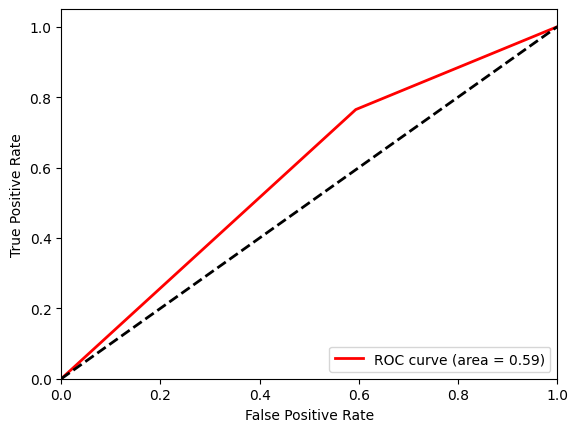

In [133]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

y_true = []
y_pred = []

with torch.no_grad():
    for (graph1, graph2, label) in graph_pairs_test:
        output = model(graph1, graph2)
        predictions = torch.round(output)
        y_true.append(label.numpy())
        y_pred.append(predictions.numpy())

y_true = np.concatenate(y_true)
y_pred = np.concatenate(y_pred)

fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

acc = np.mean(y_true == y_pred)
val_f1 = f1_score(y_true, y_pred)
val_f2 = fbeta_score(y_true, y_pred, beta=2)
val_f05 = fbeta_score(y_true, y_pred, beta=1 / 2)

print(f'Accuracy: {acc}, F1 Score: {val_f1}, F2 Score: {val_f2}, F0.5 Score: {val_f05}')

plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()